CUSTOMER CHURN PREDICTION 

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as nnp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #simplifies the creation of interactive and aesthetically pleasing data visualizations 
import plotly.graph_objects as go #provides a structured, declarative syntax to build a wide variety of plot type
from plotly.subplots import make_subplots #allows for the display and comparison of different visualizations within a single figure.
import warnings
warnings.filterwarnings('ignore')
import  missingno as msno # a data exploration tool to help understand patterns


In [4]:
#Loading the datasets 
#Loading the testing dataset 
testing_df=pd.read_csv(r"/workspaces/customer-churn-prediction/customer_churn_dataset-testing-master.csv")
#Loading the training dataset
training_df=pd.read_csv(r"/workspaces/customer-churn-prediction/customer_churn_dataset-training-master.csv")

In [5]:
#Reading the first 5 rows of the data
testing_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
training_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


EDA of Training data


In [7]:
#Checking for the shape of the data
training_df.shape


(440833, 12)

In [8]:
#Summary of the data
training_df.info 

<bound method DataFrame.info of         CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length

In [9]:
#Checking for the datatypes 
training_df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [10]:
#Checking for the column names
training_df.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype=object)

In [11]:
#Checking for the descriptive statistics
training_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [12]:
#Checking for the total missing values
training_df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

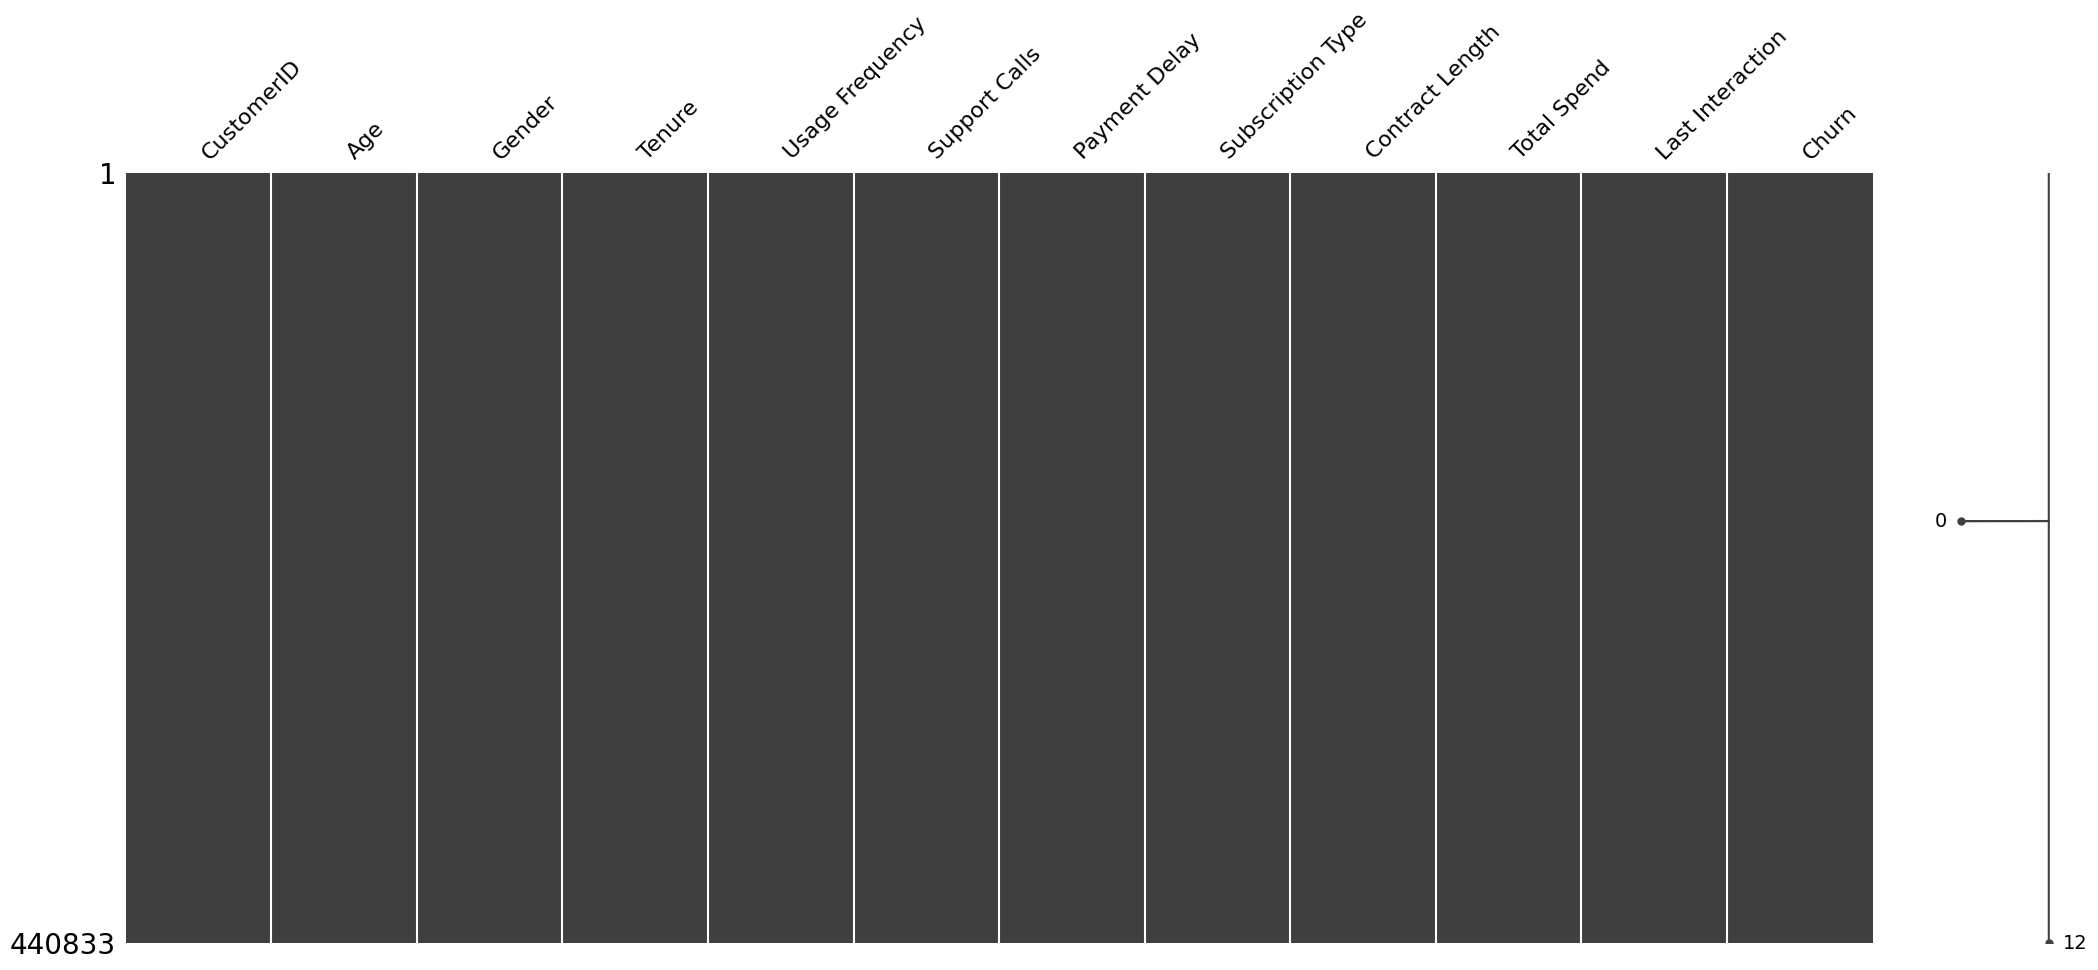

In [13]:
#Visualization of misssing  values as a matrix
msno.matrix(training_df);

Data Manipulation

In [14]:
#Finding the exact row with missing values
training_df[training_df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Dropping the missing values 
training_df = training_df.dropna()

In [16]:
#Confirming that the row was removed
training_df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [17]:
#Printing the 5 rows of the new dataset 
training_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
#shape of the clean dataset 
training_df.shape

(440832, 12)

Data Visualization

In [1]:
import plotly.io as pio
pio.renderers.default = 'notebook'


In [2]:
#Donut Styyle Pie Chart to visualize the distribution of gender and churn status in a dataset using plotly

#Definining labels for the charts
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

#Creating a 1-row, 2-column figure for pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
#domain means the chart is a pie chart or a donut meaning there will be two subplots next to each other

#First pie for  gender distribution
#Uses the counts of each gender from the DataFrame and Appears in subplot (1, 1) — the left chart.
fig.add_trace(go.Pie(labels=g_labels, values=training_df['Gender'].value_counts(), name="Gender"), 1, 1)

#Second pie for churn distribution
#Uses the churn counts and appears in sublot (1, 2)  which means on the right
fig.add_trace(go.Pie(labels=c_labels, values=training_df['Churn'].value_counts(), name="Churn"), 1, 2)

#Making them donut shaped 
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

#Adding a title and inside labels inside each donut  
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[
        dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)
    ]
)

#Display
fig.show()

NameError: name 'make_subplots' is not defined